# <font color='darkblue'>Como Prever o Preço das Ações com Python e Machine Learning
### <font color='darkblue'> Documentação Yfinance, Math, Pandas, Pandas Datareader, Numpy, tensorflow, Keras, matplotlib  e datetime
https://pypi.org/project/yfinance/

https://docs.python.org/pt-br/3/library/math.html
    
https://pypi.org/project/pandas/
    
https://pypi.org/project/pandas-datareader/   
    
https://numpy.org/pt/
    
https://pypi.org/project/tensorflow/
    m
https://www.tensorflow.org/guide/keras?hl=pt-br
         
https://matplotlib.org/stable/index.html
    
https://docs.python.org/pt-br/3/library/datetime.html

### <font color='darkblue'>Link da Aula, Para Acompanhamento    
https://www.youtube.com/watch?v=QSR0RCC3Mes&list=PLQkgHGk8rux6L42KC9l6R25AD7iimkLi_&index=6

In [4]:
# Instalar as bibliotecas abaixo:
# !pip install yfinance
# !pip install pandas
# !pip install pandas_datareader
# !pip install numpy
# !pip install tensorflow
# !pip install matplotlib
# !pip install datetime
# Para olhar se a biblioteca já está instalada, deve-se ir no Prompet do Anaconda e digitar: pip freeze

In [2]:
# Importar as bibliotecas

# Essa biblioteca efetua análise de dados financeiros utilizando a linguagem de programação Python.
import yfinance as yf

# A biblioteca math do Python executa operações matemáticas simples, como adição, subtração, multiplicação e divisão.
import math

# A biblioteca pandas-datareader é uma biblioteca do Python para importar dados de diversas fontes por meio do pandas.
from pandas_datareader import data as pdr

# Biblioteca para a linguagem Python com funções para se trabalhar com computação numérica
import numpy as np

# Pandas é biblioteca open-source e de uso gratuito, que fornece ferramentas para análise e manipulação de dados em Python.
import pandas as pd

# O módulo sklearn.preprocessing fornece várias funções utilitárias e classes de transformadores para transformar vetores 
# de recursos brutos em informações úteis para estimadores.
from sklearn.preprocessing import MinMaxScaler 

# A Biblioteca Keras é uma biblioteca aberta de Deep Learning que utilizando o TensorFlow. 
# Ela permite modelar e treinar modelos de redes neurais com poucas linhas de código.
from keras.models import Sequential

# A Biblioteca Keras é uma biblioteca aberta de Deep Learning. Ela é utilizado na criação de redes neurais 
# para resolução de várias tarefas diferentes, como classificação de imagens, detecção de objetos e regressão.
from keras.layers import Dense, LSTM

# Matplotlib é uma biblioteca Python frequentemente utilizada para ciência de dados. É uma ferramenta de código aberto
# que oferece recursos de plotagem para a criação de gráficos 2D e 3D com visualizações estáticas, animadas e interativas.
import matplotlib.pyplot as plt

# Essa biblioteca efetua manipulação de séries no tempo para data frame
from datetime import timedelta
from datetime import datetime

# Desativa os warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

### <font color='darkblue'> Selecionar os Ativos (MGLU3) do Yfinance e Definir a Data (Período)

In [4]:
# Definindo o nome do ativo (Não esquecer de colocar S.A)
acao = "MGLU3.SA"

# Definindo a data (Início e Final)
inicio = "2013-12-31"
final = "2023-10-28"

# Vamos pegar as informações do ativo (Ação) no Yfinance, dados de (início e fim estipulado acima)
dados_acao = yf.download(acao, inicio, final)

# Imprimindo o data frame do Ativo (Ação)
dados_acao

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,0.237812,0.244375,0.217187,0.225937,0.203837,40896000
2014-01-03,0.228125,0.234062,0.220937,0.233437,0.210603,25686400
2014-01-06,0.234375,0.246875,0.234062,0.245625,0.221599,19190400
2014-01-07,0.246875,0.258437,0.246875,0.251875,0.227237,40121600
2014-01-08,0.251250,0.257500,0.250312,0.256875,0.231748,25312000
...,...,...,...,...,...,...
2023-10-23,1.530000,1.560000,1.500000,1.510000,1.510000,159551900
2023-10-24,1.530000,1.550000,1.410000,1.410000,1.410000,167993400
2023-10-25,1.400000,1.460000,1.300000,1.440000,1.440000,251461900


### <font color='darkblue'> Vamos Pegar o Valor de Fechamento (Close) para Calcular o Nosso Modelo de Machine Learning

In [6]:
# Pegando o campo (Close) utilizando o numpy para obtermos os vetores desejados
cotacao = dados_acao['Close'].to_numpy().reshape(-1, 1)
cotacao

array([[0.22593699],
       [0.233437  ],
       [0.245625  ],
       ...,
       [1.44000006],
       [1.47000003],
       [1.46000004]])

### <font color='darkblue'> Vamos Treinar Nosso Modelo de Machine Learning em 80% 

In [8]:
tamanho_dados_treinamento = int(len(cotacao) * 0.8)
tamanho_dados_treinamento

# A Informação abaixo é referente a quantidade de dias (data Início e Final definido acima)

1954

### <font color='darkblue'> Vamos Definir uma Escala de (0 à 1) Para Facilitar o Processamento do Apredizado de Máquina

In [11]:
# Escalar os dados entre 0 e 1, para deixar mais fácil o processamento
# Dados em escala pré definidas são mais fáceis de lidar. 

escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))
                                                

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)
dados_entre_0_e_1

array([[0.00712459],
       [0.00739812],
       [0.00784262],
       ...,
       [0.05140208],
       [0.0524962 ],
       [0.05213149]])

### <font color='darkblue'> Vamos Fazer o Treinamento

In [12]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

# Dados que serão usados para gerar o resultado
treinamento_x = []
# Cotação que aconteceu de fato
treinamento_y = []

# Vamos pegar os ultimos 60 dias para efetuarmos o treinamento de rede neural
for i in range(60, len(dados_para_treinamento)):

    #60 ultimos dias
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
    #cotacao
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:

        print(treinamento_x)
        print(treinamento_y)

[array([0.00712459, 0.00739812, 0.00784262, 0.00807056, 0.00825291,
       0.00820732, 0.00817311, 0.00823012, 0.00828708, 0.00832129,
       0.00843526, 0.00819591, 0.0082757 , 0.00817311, 0.008686  ,
       0.00857203, 0.0082985 , 0.00823012, 0.00805914, 0.00770585,
       0.00788821, 0.00794517, 0.00762606, 0.00748929, 0.00766027,
       0.00787679, 0.00823012, 0.00787679, 0.00800218, 0.00786541,
       0.00758047, 0.00771723, 0.00779703, 0.00781982, 0.00738674,
       0.007079  , 0.00737532, 0.00728415, 0.00695365, 0.00693086,
       0.00690806, 0.00690806, 0.00664591, 0.00686247, 0.0067713 ,
       0.00658894, 0.00633821, 0.00605327, 0.00565439, 0.00572277,
       0.00573415, 0.00590512, 0.00575694, 0.00589371, 0.00617865,
       0.00621282, 0.00614444, 0.00617865, 0.00628121, 0.00632679])]
[0.0062698272564498045]
[array([0.00712459, 0.00739812, 0.00784262, 0.00807056, 0.00825291,
       0.00820732, 0.00817311, 0.00823012, 0.00828708, 0.00832129,
       0.00843526, 0.00819591, 0.0

### <font color='darkblue'> Vamos Transformar os Dois Arrays Listados Acima em Um Array (3D)

In [14]:
#transformando as listas em arrays e dando reshape 3d 
treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)
treinamento_x
treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)
treinamento_x

array([[[0.00712459],
        [0.00739812],
        [0.00784262],
        ...,
        [0.00617865],
        [0.00628121],
        [0.00632679]],

       [[0.00739812],
        [0.00784262],
        [0.00807056],
        ...,
        [0.00628121],
        [0.00632679],
        [0.00626983]],

       [[0.00784262],
        [0.00807056],
        [0.00825291],
        ...,
        [0.00632679],
        [0.00626983],
        [0.00639518]],

       ...,

       [[0.73814175],
        [0.7071418 ],
        [0.70313002],
        ...,
        [0.45257764],
        [0.43397771],
        [0.47774231]],

       [[0.7071418 ],
        [0.70313002],
        [0.68598891],
        ...,
        [0.43397771],
        [0.47774231],
        [0.47373057]],

       [[0.70313002],
        [0.68598891],
        [0.69000069],
        ...,
        [0.47774231],
        [0.47373057],
        [0.49670696]]])

### <font color='darkblue'> Vamos Criar Nosso Modelo

In [17]:
# Construindo o modelo
modelo = Sequential()

# Vamos criar um modelo com 50 neurônios
# Return sequences = True pois vamos usar outro LSTM depois.
# Definir o shape, que no caso são 60 informações para gerar uma.
# Adicionar mais neurônios com o dense, 25 e 1
# Não se apegue a isso agora, é apenas um arquitetura de deep learning.

modelo.add(LSTM(50, return_sequences=True, input_shape = (treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

treinamento_x.shape[1]

60

### <font color='darkblue'> Vamos Condensar Nossa Informação e Medir a Médida de Erro do Modelo

In [20]:
# Copilando o modelo
# A função de loss é a forma de medir o erro do modelo, que nesse caso
# É o classico erro médio quadrático da que é usado em regressão linear
# Otimizador e medida de erro

modelo.compile(optimizer="adam", loss="mean_squared_error") 

### <font color='darkblue'> Vamos Treinar o Modelo

In [21]:
# Agora com o modelo copilado e os dados, podemos treinar o modelo
# (batch_size)- Siguinifica: de quantas em quantas amostras o modelo irá otimizar os paâmentros
# (epochs) - Siguinifica: quantas vezes o algorítimo irá rodar os dados treinamentos, aprendendo cada vez mais.

modelo.fit(treinamento_x, treinamento_y, batch_size=1, epochs=1)

1894/1894 [==============================] - 51s 25ms/step - loss: 0.0024


### <font color='darkblue'> Vamos Testar o Modelo

In [23]:
# Vamos criar dados de teste

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]
teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :] 

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])

In [24]:
# Reshape
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [25]:
# Pegando predições do modelo
predicoes = modelo.predict(teste_x)

# Tirando a escala dos dados
predicoes = escalador.inverse_transform(predicoes)

predicoes

16/16 [==============================] - 2s 29ms/step


array([[12.995428 ],
       [12.830609 ],
       [12.486803 ],
       [12.038481 ],
       [11.588067 ],
       [11.138232 ],
       [10.706367 ],
       [10.339844 ],
       [10.033501 ],
       [ 9.735053 ],
       [ 9.463341 ],
       [ 9.209324 ],
       [ 8.908955 ],
       [ 8.593442 ],
       [ 8.317952 ],
       [ 8.110494 ],
       [ 7.988791 ],
       [ 7.8620834],
       [ 7.697039 ],
       [ 7.527956 ],
       [ 7.3428836],
       [ 7.1366963],
       [ 6.9695024],
       [ 6.859274 ],
       [ 6.815006 ],
       [ 6.787589 ],
       [ 6.7794714],
       [ 6.761626 ],
       [ 6.7417707],
       [ 6.770176 ],
       [ 6.8305907],
       [ 6.8999915],
       [ 7.007338 ],
       [ 7.087611 ],
       [ 7.134753 ],
       [ 7.1412287],
       [ 7.1076236],
       [ 7.049466 ],
       [ 6.9410343],
       [ 6.821136 ],
       [ 6.7408   ],
       [ 6.6738305],
       [ 6.6405835],
       [ 6.613486 ],
       [ 6.572912 ],
       [ 6.561746 ],
       [ 6.598144 ],
       [ 6.68

In [26]:
# Pegando o erro médio quadrático (RMSE)
rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

0.43734043531866407

In [27]:
# Criando o grafico do modelo
treinamento = dados_acao.iloc[:tamanho_dados_treinamento, :]
df_teste = pd.DataFrame({"Close": dados_acao['Close'].iloc[tamanho_dados_treinamento:],
                        "predicoes": predicoes.reshape(len(predicoes))})

### <font color='darkblue'> Vamos Plotar o Gráfico

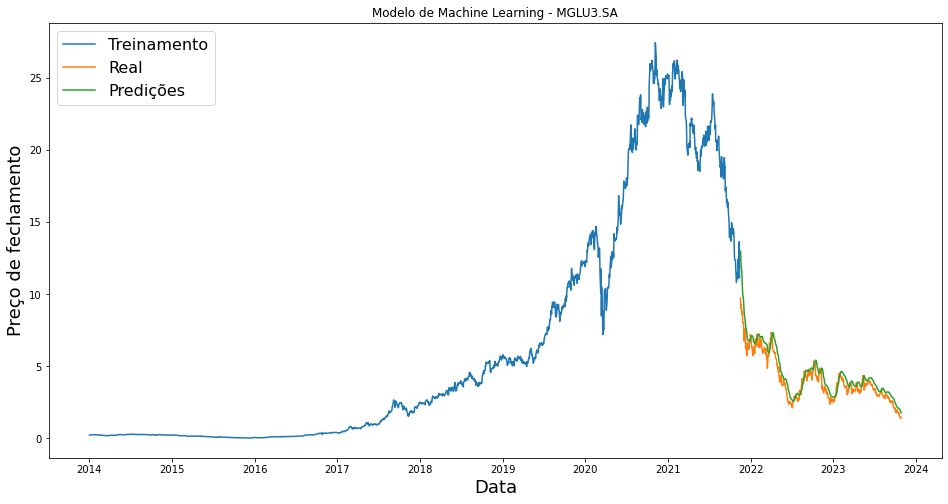

In [31]:
plt.figure(figsize =(16, 8))
plt.title('Modelo de Machine Learning - MGLU3.SA')
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento", fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})

# Depois vamos salvar o gráfico em nossa pasta, "plt.savefig('selic.png', dpi = 300)"
plt.savefig('Modelo Machine Learning.png', dpi=300)

plt.show()

### <font color='darkblue'> Vamos Analisar se o Modelo Acertou sua Predição Quanto a Queda e Subida da Ação

In [32]:
df_teste.sort_index()
df_teste

,Close,predicoes
Date,,
2021-11-16,9.74,12.995428
2021-11-17,9.27,12.830609
2021-11-18,8.99,12.486803
2021-11-19,9.27,12.038481
2021-11-22,8.84,11.588067
...,...,...
2023-10-23,1.51,1.970967
2023-10-24,1.41,1.926063
2023-10-25,1.44,1.874017


### <font color='darkblue'> Vamos Ver a Variação Percentual do Modelo, Variação da Ação

In [33]:
#o preço é legal, mas o importante é acertar pra qual mercado o lado vai. Sera q isso foi feito?

#calcular media de acertos e expectativa de lucro

df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, 
                                                      True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0, 
                                                      True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
                                      , True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2021-11-17,9.27,12.830609,-0.048255,-0.012683,False,False,True,0.048255
2021-11-18,8.99,12.486803,-0.030205,-0.026796,False,False,True,0.030205
2021-11-19,9.27,12.038481,0.031146,-0.035904,True,False,False,0.031146
2021-11-22,8.84,11.588067,-0.046386,-0.037414,False,False,True,0.046386
2021-11-23,8.60,11.138232,-0.027149,-0.038819,False,False,True,0.027149
...,...,...,...,...,...,...,...,...
2023-10-23,1.51,1.970967,-0.019481,-0.020165,False,False,True,0.019481
2023-10-24,1.41,1.926063,-0.066225,-0.022783,False,False,True,0.066225
2023-10-25,1.44,1.874017,0.021277,-0.027022,True,False,False,0.021277


In [36]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1]/media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.036340
True     0.038015
Name: variacao_percentual_acao_abs, dtype: float64
1.0460974900273021
0.5266393442622951
0.28183755134418076


In [ ]:
# O modelo acertou (52,6%)
# Em cada Trader que você efetuar, ganharia (0,28%) por dia para cada trade efetuado 

### <font color='darkblue'> Vamos Criar um Código Que Você Passa 60 Dias e Ele Devolve a Cotação de Amanhã

In [38]:
# Criando um código que você passa 60 dias e ele devolve a cotação
# Resumindo: vamos descobrir o preço da (MGLU3) de hoje/amanha com esse modelo

data_hoje = datetime.now()

# Se quiser escolher um dia, basta fazer assim

data_hoje = datetime.now() - timedelta(days = 1)

if data_hoje.hour > 18:
    
    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)
    
else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)
    
#nao vai botar outra ação aqui hein kkkkkkkk
cotacoes = yf.download(acao, inicio, final)
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 54ms/step
[[1.7466314]]


###### <font color='Red'> Projeto (28/10/2023): Como Prever os Preços das Ações - William E. Santos. 